In [1]:
import sys
sys.path.append("/Users/anuram/Documents/hydrogenase-ftir/src")
sys.path.append("/Users/anuram/Documents/hydrogenase-ftir/notebooks/anu_winter_2024")
#sys.path.append("/Users/anuram/Documents/Documents/hydrogenase-ftir/src/hydrogenase_processing")

In [2]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib

#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtract_prospecpy_objects
from hydrogenase_processing.second_deriv import  second_deriv_prospecpy_objects
from hydrogenase_processing.baseline import baseline_correction_prospecpy_objects
from hydrogenase_processing.peak_fit import gaussian_fit_prospecpy_objects, lorentzian_fit_prospecpy_objects
from hydrogenase_processing.io import import_run_data
from hydrogenase_processing.interact import interact


# Importing spectra data and water vapor data

In [3]:
#Paths to Local Data
path_to_water_vapor_data = pathlib.Path("../../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../../data/output_plots/")
path_to_pD6_data = pathlib.Path("../../data/opus_files/pD6")

In [4]:
pD6_raw_data = import_run_data(path_to_pD6_data, input_type="raw spectra", output_folder = '../../output_plots/')
wv_data = import_run_data(path_to_water_vapor_data)

In [5]:
pD6_raw_data[0].output_folder

'../../output_plots//pD6/Hyd1 pD6 ACT.0000'

# Subtracting water vapor from raw spectra

In [6]:
#Initializing dict of post water vapor subtraction spectra
cut_range_subtract_prospecpy_objects(pD6_raw_data, wv_data, range_start = 2150, range_end = 1850, showplots=False, verbose= True)
#pD6_raw_data[].cut_subtracted_data

Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/cut_range_subtracted_spectra
Atmospheric fit parameters saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/cut_atmfitparameters.csv
Cut subtracted data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/cut_subtracted_data.csv
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/cut_range_subtracted_spectra
Atmospheric fit parameters saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/cut_atmfitparameters.csv
Cut subtracted data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/cut_subtracted_data.csv
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0002/cut_range_subtracted_spectra
Atmospheric fit parameters saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0002/cut_atmfitparameters.csv
Cut subtracted data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0002/cut_subtracted_data.csv
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0003/cut_range_subtracted_spectra
Atmospheric fit parameters saved to ../../output_plots//pD6/Hyd1 p

## Get the second derivatives

In [7]:
second_deriv_prospecpy_objects(pD6_raw_data, show_plots=False, verbose = True)

Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/subtracted_spectra
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/second_derivative_fig
Second derivative csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/second_derivative_data.csv
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/subtracted_spectra
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/second_derivative_fig
Second derivative csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/second_derivative_data.csv
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0002/subtracted_spectra
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0002/second_derivative_fig
Second derivative csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0002/second_derivative_data.csv
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0003/subtracted_spectra
Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0003/second_derivative_fig
Second derivative csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.

## Using a user interface please select the appropriate number of peaks using the threshold variable and number of anchor points using adjustment factor variable

In [8]:
interact(pD6_raw_data,0.4,1.8)

ToggleButtons(description='Step 1. File selection:', options=('Hyd1 pD6 ACT.0000', 'Hyd1 pD6 ACT.0001', 'Hyd1 …

Output()

BoundedFloatText(value=0.4, description='Threshold for peak selection(0.01 to 1 in 0.01 steps):', layout=Layou…

BoundedFloatText(value=1.8, description='adj for anchor point selection(0.01 to 5 in 0.01 steps):', layout=Lay…

Button(description='Save', style=ButtonStyle())

In [9]:
pD6_raw_data[26].anchor_points

# Baseline correction and cruve fit for an example spectra workflow:

## Fit baseline spline through these anchor points to be used for baseline correction of raw spectra

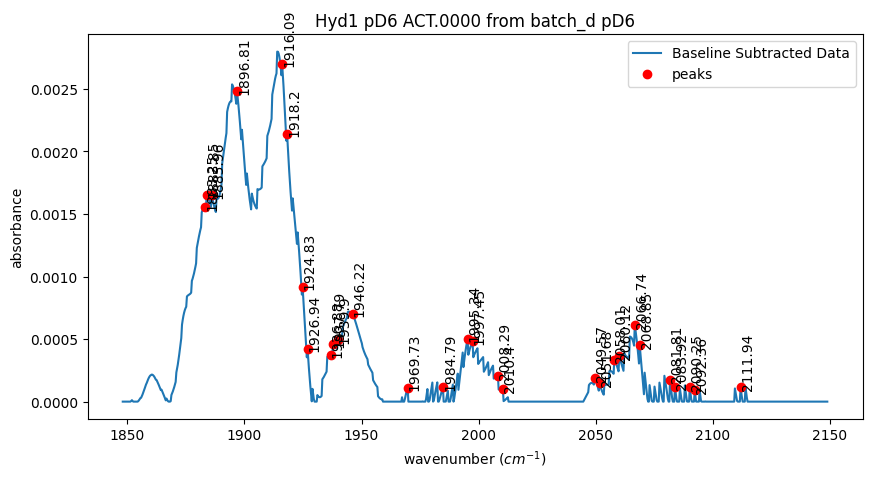

Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/baseline_subtracted_spectra
Baseline corrected csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/baseline_corrected_data.csv
Baseline corrected peak info saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0000/baseline_corrected_peak_info.csv


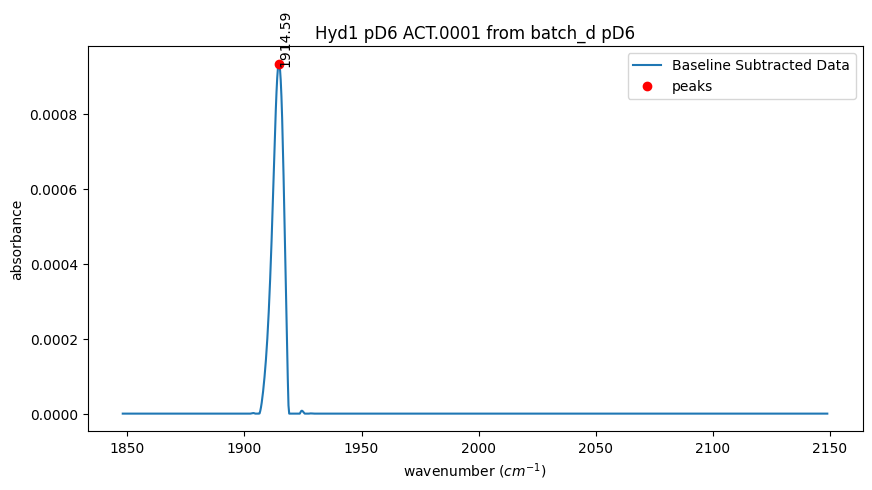

Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/baseline_subtracted_spectra
Baseline corrected csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/baseline_corrected_data.csv
Baseline corrected peak info saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0001/baseline_corrected_peak_info.csv
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!


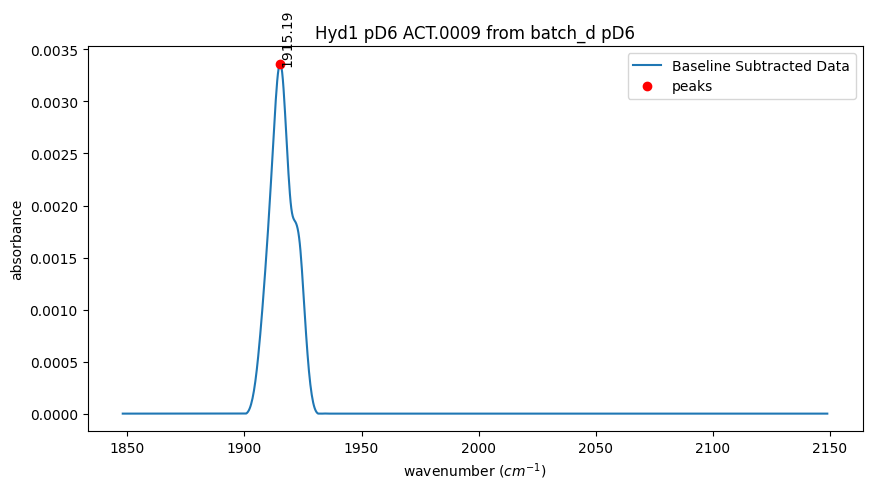

Plot saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0009/baseline_subtracted_spectra
Baseline corrected csv data saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0009/baseline_corrected_data.csv
Baseline corrected peak info saved to ../../output_plots//pD6/Hyd1 pD6 ACT.0009/baseline_corrected_peak_info.csv
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline sp

In [14]:
baseline_correction_prospecpy_objects(pD6_raw_data, showplot = True, save = True, verbose = True)

# Fitting gaussian and lorentizian curves on the baseline corrected data

In [11]:
gaussian_fit_prospecpy_objects(pD6_raw_data, show_plots = True, save = True, verbose = True)

An error occurred: Optimal parameters not found: Number of calls to function has reached maxfev = 3800.


In [12]:
lorentzian_fit_prospecpy_objects(pD6_raw_data, show_plots = True, save = True, verbose = True)

An error occurred: Optimal parameters not found: Number of calls to function has reached maxfev = 3800.
